## Testing otsu thresholding 

In [5]:
import sys
import numpy as np
#from hdff import *
import numpy as np
import os
from sys import argv,exit
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage import data, io, feature, color
from scipy import ndimage, misc
import glob
from PIL import Image
#import cv2

In [6]:
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\jh2own\EuroVisData\fullres\100_persistence'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\jh2own\EuroVisData\fullres\100'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\meteorite\EuroVisData\quality_3\100'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\battery\EuroVisData\quality_3\500'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\JH2_xray_9MeV_neutron_Phoenix\100'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\xr05_xray_real_neutron_ltt\100'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\synthetic_cylinder\EuroVisData\fullres\100_persistence'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\xr05_ltt\EuroVisData\fullres\500'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\jh2ltt\EuroVisData\eval_neutron'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\jh2ltt\EuroVisData\gradmag'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\jh2ltt\EuroVisData\fullres\100_persistence'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\jh2ltt\EuroVisData\fullres\100_norm'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\jh2ltt\EuroVisData\fullres\thresholded'
#folder =r'C:\Users\miao1\Development\histogram_analysis_multifield\data\meteorite\EuroVisData\gradmag'
folder =r'/home/xuanhuang/Desktop/bivariantData/jh2ltt'

bins = 100
name = ""
histogram_fpath = os.path.join(folder, "{}_{}_{}_float32.raw".format(name, bins, bins))
data = np.fromfile(histogram_fpath, dtype=np.float32)
dimx = bins
dimy = bins
print("shape", data.shape)

shape (10000,)


In [7]:
img = data.reshape([dimy,dimx])
print("shape", img.shape)

shape (100, 100)


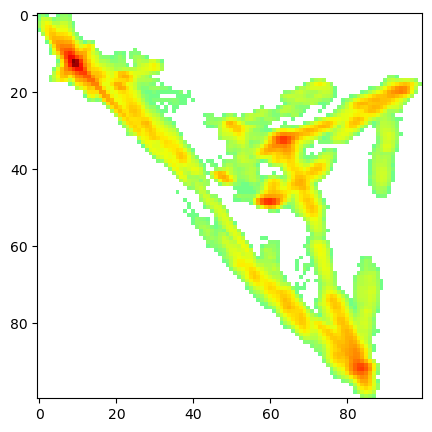

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(img, cmap=plt.cm.jet, norm=colors.LogNorm())
#print(img)

In [60]:
img_log = np.log(img, out=np.zeros_like(img), where=(img!=0))
img_log = np.rint(img_log).astype(int)

array([[1, 3, 1, ..., 0, 0, 0],
       [2, 5, 5, ..., 0, 0, 0],
       [3, 6, 7, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

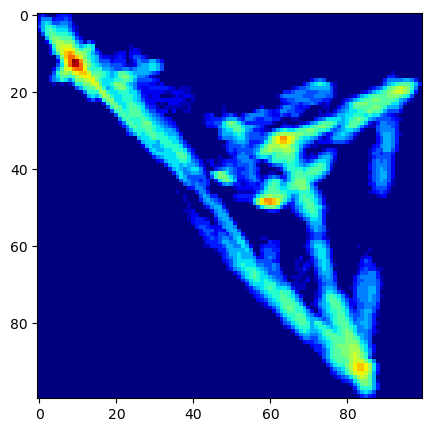

In [61]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(img_log, cmap=plt.cm.jet)

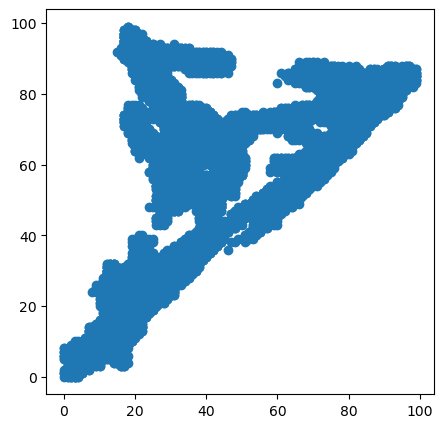

In [73]:
range1 = img_log.max()
range0 = img_log.min()
x=[]
y=[]
x=np.array(x,dtype=int)
y=np.array(y,dtype=int)
for iy, ix in np.ndindex(img_log.shape):
    for i in range(img_log[iy, ix]):
        x=np.append(x, ix)
        y=np.append(y, iy)

scatter_data = np.array(list(zip(y,x)))

plt.figure(figsize=(5, 5))
plt.scatter(scatter_data[:, 0], scatter_data[:, 1])
plt.show()

In [76]:
from sklearn.cluster import KMeans

In [105]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(scatter_data)
group = kmeans.labels_

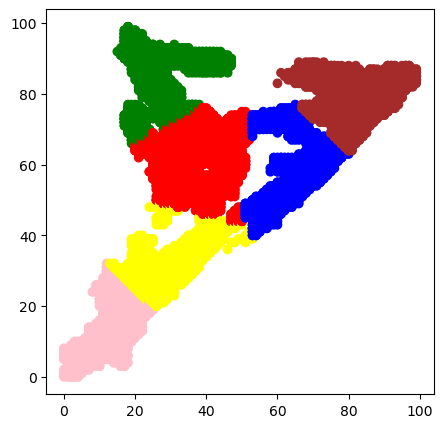

In [106]:
colormap = np.array(['red', 'blue', 'green', 'yellow', 'brown', 'pink', 'purple'])

plt.figure(figsize=(5, 5))
plt.scatter(scatter_data[:, 0], scatter_data[:, 1], c=colormap[group])
plt.show()

In [107]:
seg_hist = np.zeros(shape=[dimx, dimy])
for ix in np.ndindex(x.shape):
    vx = x[ix]
    vy = y[ix]
    vl = group[ix]
    seg_hist[vx, vy] = vl+1

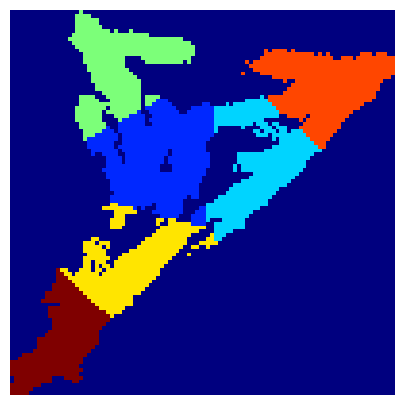

In [126]:
#fig = plt.figure(frameon=True, figsize=(size/my_dpi, size/my_dpi), dpi=my_dpi)
fig = plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(seg_hist, cmap=plt.cm.jet, origin='lower')

In [124]:
hist_fpath = os.path.join(folder, '{}_{}_{}_hist_kmean.png'.format(name, bins, bins))
fig.savefig(hist_fpath, format='png', bbox_inches='tight', pad_inches = 0)